# Aula 8 - Time Series

### Objetivos
Desenvolver o embasamento conceitual e em programação para analisar uma série temporal.

`!pip install pandas-datareader`

`!pip install requests`  
`!pip install yfinance`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import datetime as dt
import requests

In [4]:
warnings.filterwarnings('ignore')

# Datetime

## Relembrando como trabalhar com dados temporais!

In [5]:
hoje_str = '08/11/2021'
ontem_str = '07/11/2021'

In [6]:
type(hoje_str)

str

In [12]:
hoje_str - 1

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [8]:
hoje_dt = dt.date(2021, 11, 8)

In [9]:
hoje_dt

datetime.date(2021, 11, 8)

In [28]:
print(f'''
DT:  {hoje_dt} {type(hoje_dt)}
str: {hoje_str} {type(hoje_str)}''')


DT:  2021-11-08 <class 'datetime.date'>
str: 08/11/2021 <class 'str'>


In [29]:
hoje_dt - dt.timedelta(days=1)

datetime.date(2021, 11, 7)

In [30]:
horario_str = '19:20:00'
horario_dt = dt.time(19, 20, 0)

In [31]:
print(f'''
DT:  {horario_dt} {type(horario_dt)}
str: {horario_str} {type(horario_str)}
''')


DT:  19:20:00 <class 'datetime.time'>
str: 19:20:00 <class 'str'>



In [32]:
datetime_str = '08/11/2021 19:21:00'
datetime_dt = dt.datetime(2021, 11, 8, 19, 21, 0)

In [33]:
print(f'''
DT:  {datetime_dt} {type(datetime_dt)}
str: {datetime_str} {type(datetime_str)}
''')


DT:  2021-11-08 19:21:00 <class 'datetime.datetime'>
str: 08/11/2021 19:21:00 <class 'str'>



In [40]:
print(f'''
ano:     {datetime_dt.year}
mes:     {datetime_dt.month}
dia:     {datetime_dt.day}
segundo: {datetime_dt.second}
data:    {datetime_dt.date()}
horario: {datetime_dt.time()}
''')


ano:     2021
mes:     11
dia:     8
segundo: 0
data:    2021-11-08
horario: 19:21:00



In [41]:
amanha = dt.datetime(2021, 11, 9, 1, 2, 3)

In [43]:
amanha.date()

datetime.date(2021, 11, 9)

In [44]:
amanha.time()

datetime.time(1, 2, 3)

In [47]:
dt.datetime.isoweekday(hoje_dt - dt.timedelta(1))

7

In [51]:
(hoje_dt - dt.timedelta(1)).weekday() 

6

In [53]:
dt.datetime.isoformat(amanha)

'2021-11-09T01:02:03'

In [54]:
dt.datetime.today()

datetime.datetime(2021, 11, 8, 19, 30, 22, 511874)

In [55]:
dt.date.today()

datetime.date(2021, 11, 8)

In [56]:
dt.datetime.now()

datetime.datetime(2021, 11, 8, 19, 32, 22, 81634)

In [61]:
# strftime => datetime para str

print(f'''
%d/%m/%y: {dt.datetime.strftime(amanha, format="%d/%m/%y")}
%d/%m/%Y: {dt.datetime.strftime(amanha, format="%d/%m/%Y")}
%d/%B/%Y: {dt.datetime.strftime(amanha, format="%d/%B/%Y")}
%d/%b/%Y: {dt.datetime.strftime(amanha, format="%d/%b/%Y")}
%a: {dt.datetime.strftime(amanha, format="%a")}
''')


%d/%m/%y: 09/11/21
%d/%m/%Y: 09/11/2021
%d/%B/%Y: 09/November/2021
%d/%b/%Y: 09/Nov/2021
%a: Tue



In [64]:
# strptime => str para datetime
print(f'''
String: {hoje_str}
datetime: {dt.datetime.strptime(hoje_str, '%d/%m/%Y')}
String2: 30 de January de 2021
datetime2: {dt.datetime.strptime('30 de January de 2021', '%d de %B de %Y')}
''')


String: 08/11/2021
datetime: 2021-11-08 00:00:00
String2: 30 de January de 2021
datetime2: 2021-01-30 00:00:00



# Capturando dados financeiros

https://finance.yahoo.com/

In [65]:
import yfinance as yf
df_mg = yf.download('MGLU3.SA', start = '2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [67]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1203 entries, 2017-01-02 to 2021-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1203 non-null   float64
 1   High       1203 non-null   float64
 2   Low        1203 non-null   float64
 3   Close      1203 non-null   float64
 4   Adj Close  1203 non-null   float64
 5   Volume     1203 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 65.8 KB


In [68]:
df_mg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1.203000e+03
mean,9.907792,10.098793,9.697087,9.896960,9.787248,4.429698e+07
std,8.168601,8.312256,8.005448,8.156113,8.175088,2.727965e+07
min,0.369531,0.382812,0.367851,0.367851,0.351092,0.000000e+00
25%,2.853594,2.906250,2.810313,2.860156,2.759503,2.730230e+07
50%,6.093750,6.212500,5.989062,6.085625,5.920398,3.823400e+07
75%,17.546249,17.915000,17.182500,17.445001,17.355527,5.304500e+07
max,28.150000,28.309999,26.740000,27.450001,27.401571,3.612832e+08


<AxesSubplot:xlabel='Date'>

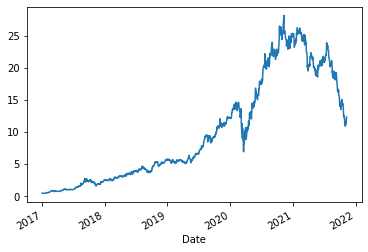

In [69]:
df_mg.Open.plot()

<AxesSubplot:xlabel='Date'>

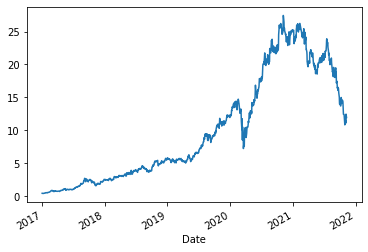

In [71]:
df_mg.Close.plot()

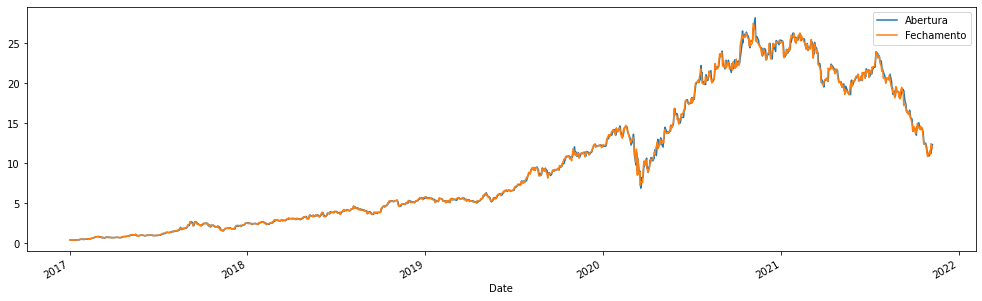

In [74]:
df_mg.Open.plot(label='Abertura', figsize=(17, 5))
df_mg.Close.plot(label='Fechamento')
plt.legend()

In [75]:
df_mg_bk = df_mg.copy()

In [76]:
df_mg.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-11-01', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08'],
              dtype='datetime64[ns]', name='Date', length=1203, freq=None)

In [81]:
df_mg_bk.index = df_mg_bk.reset_index().Date.dt.strftime('%Y-%m-%d')

In [82]:
df_mg_bk.index

Index(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
       ...
       '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
       '2021-11-01', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08'],
      dtype='object', name='Date', length=1203)

In [84]:
df_mg_bk['2021']

KeyError: '2021'

In [83]:
df_mg['2021']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,25.260000,25.580000,24.870001,25.200001,25.181740,25706100
2021-01-05,25.100000,25.180000,24.340000,24.760000,24.742058,25431900
2021-01-06,24.650000,24.660000,23.420000,23.459999,23.442999,51799000
2021-01-07,23.639999,23.850000,22.950001,23.160000,23.143217,42146600
2021-01-08,23.190001,24.299999,23.020000,23.840000,23.822723,43988100
...,...,...,...,...,...,...
2021-11-01,10.870000,11.430000,10.860000,11.300000,11.300000,31309000
2021-11-03,11.190000,11.670000,10.990000,11.550000,11.550000,47660400
2021-11-04,11.500000,11.820000,10.930000,11.080000,11.080000,34112300


In [85]:
df_mg['2021-11']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,10.87,11.43,10.86,11.30,11.30,31309000
2021-11-03,11.19,11.67,10.99,11.55,11.55,47660400
2021-11-04,11.50,11.82,10.93,11.08,11.08,34112300
2021-11-05,11.22,12.62,11.16,12.44,12.44,65633000
2021-11-08,12.31,12.66,11.87,11.93,11.93,47182200


In [86]:
df_mg['2021-11'].index

DatetimeIndex(['2021-11-01', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

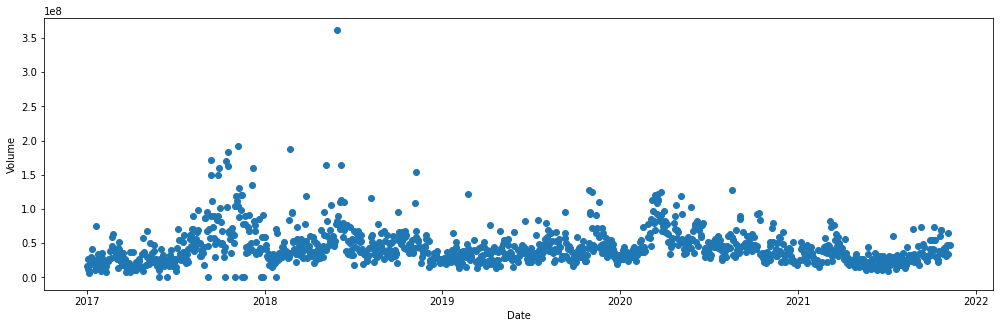

<AxesSubplot:xlabel='Date'>

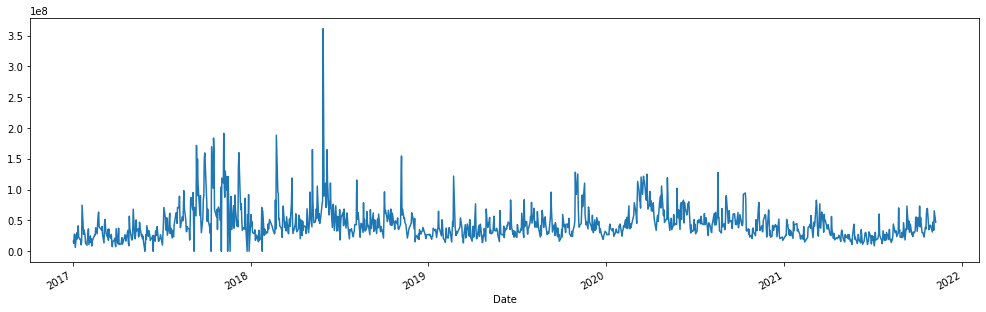

In [90]:
vol_mg = df_mg['Volume']
plt.figure(figsize=(17,5))
plt.scatter(df_mg.index, vol_mg)

plt.xlabel('Date')
plt.ylabel('Volume')
plt.show();
df_mg.Volume.plot(figsize=(17,5))

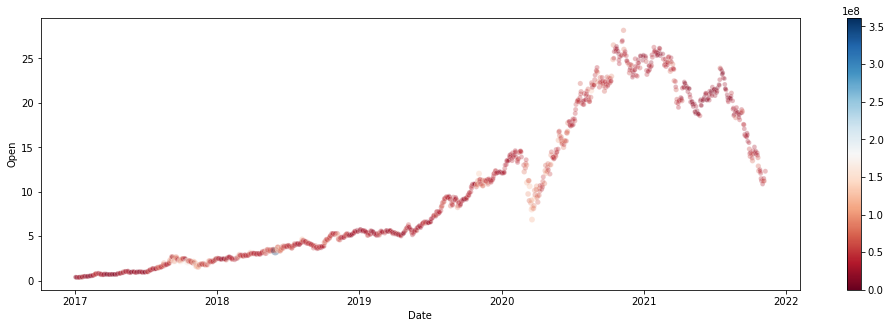

In [92]:
# 19
plt.figure(figsize=(17,5))
ax = sns.scatterplot(
    x=df_mg.index,
    y=df_mg['Open'],
    hue=df_mg['Volume'],
    size=df_mg['Volume'],
    palette='RdBu',
    alpha=0.3
)

norm = plt.Normalize(df_mg['Volume'].min(),
                     df_mg['Volume'].max())
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

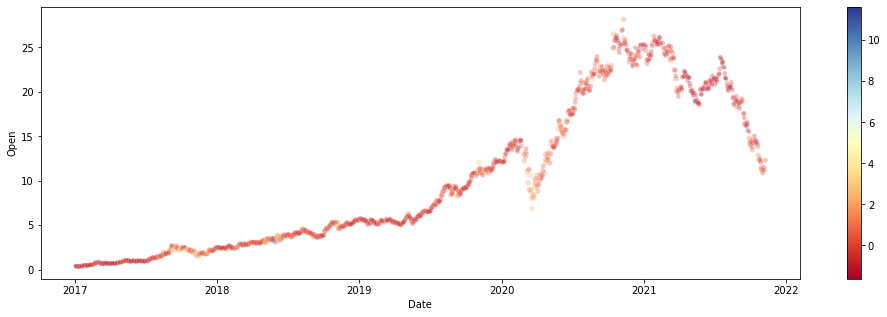

In [100]:
# 19
plot1 = df_mg.copy()
plot1['VolNorm'] = (plot1.Volume - plot1.Volume.mean()) / plot1.Volume.std()
plt.figure(figsize=(17,5))
ax = sns.scatterplot(
    x=plot1.index,
    y=plot1['Open'],
    hue=plot1['VolNorm'],
    size=plot1['VolNorm'],
    palette='RdYlBu',
    alpha=0.3
)

norm = plt.Normalize(plot1['VolNorm'].min(),
                     plot1['VolNorm'].max())
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

<AxesSubplot:xlabel='Date'>

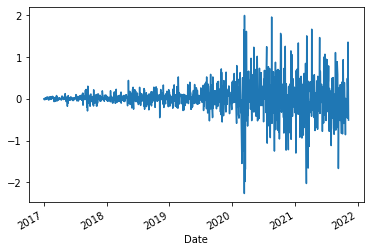

In [105]:
(df_mg['Close'] - df_mg['Close'].shift()).plot()

<AxesSubplot:xlabel='Close', ylabel='Close'>

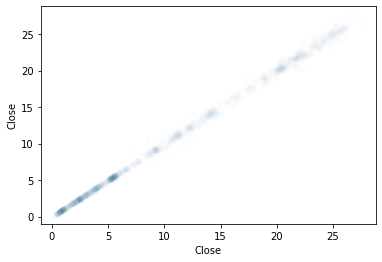

In [110]:
sns.scatterplot(x=df_mg['Close'], y = df_mg['Close'].shift(), alpha = 0.01)

<AxesSubplot:xlabel='Close', ylabel='Close'>

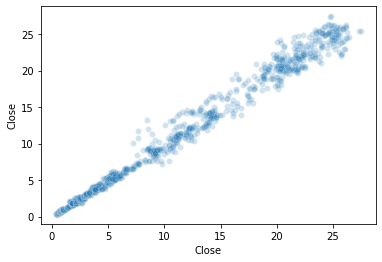

In [119]:
# correlação
sns.scatterplot(x=df_mg['Close'], y = df_mg['Close'].shift(7), alpha = 0.2)

In [120]:
df_mg.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.410273,0.411953,0.397304,0.397304,0.379203,16025600
2017-01-03,0.400351,0.407343,0.390625,0.396093,0.378047,12825600
2017-01-04,0.394531,0.396289,0.371484,0.375000,0.357915,27468800
2017-01-05,0.376796,0.387890,0.376757,0.387890,0.370218,27622400
2017-01-06,0.387890,0.390078,0.382812,0.385390,0.367832,6400000
2017-01-09,0.385429,0.386718,0.367851,0.367851,0.351092,29849600
2017-01-10,0.369531,0.382812,0.369179,0.376601,0.359443,19968000
2017-01-11,0.374882,0.383984,0.374882,0.380859,0.363507,28748800
2017-01-12,0.385937,0.408164,0.385039,0.406250,0.387741,41216000


In [129]:
new_index = pd.date_range(df_mg.index.min(), df_mg.index.max())

In [130]:
new_index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11',
               ...
               '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02',
               '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', length=1772, freq='D')

In [131]:
df_mg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.410273,0.411953,0.397304,0.397304,0.379203,16025600
2017-01-03,0.400351,0.407343,0.390625,0.396093,0.378047,12825600
2017-01-04,0.394531,0.396289,0.371484,0.375000,0.357915,27468800
2017-01-05,0.376796,0.387890,0.376757,0.387890,0.370218,27622400
2017-01-06,0.387890,0.390078,0.382812,0.385390,0.367832,6400000


In [134]:
df_mg_filled = df_mg.reindex(new_index)

In [137]:
print(df_mg_filled.shape[0], df_mg.shape[0], df_mg_filled.shape[0] - df_mg.shape[0])
df_mg_filled.info()

1772 1203 569
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1772 entries, 2017-01-02 to 2021-11-08
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1203 non-null   float64
 1   High       1203 non-null   float64
 2   Low        1203 non-null   float64
 3   Close      1203 non-null   float64
 4   Adj Close  1203 non-null   float64
 5   Volume     1203 non-null   float64
dtypes: float64(6)
memory usage: 96.9 KB


In [138]:
df_mg_filled[['Open', 'High', 'Low', 'Close', 'Adj Close']] = df_mg_filled[['Open', 'High', 'Low', 'Close', 'Adj Close']].ffill()

In [139]:
df_mg_filled.head(10)

,Open,High,Low,Close,Adj Close,Volume
2017-01-02,0.410273,0.411953,0.397304,0.397304,0.379203,16025600.0
2017-01-03,0.400351,0.407343,0.390625,0.396093,0.378047,12825600.0
2017-01-04,0.394531,0.396289,0.371484,0.375000,0.357915,27468800.0
2017-01-05,0.376796,0.387890,0.376757,0.387890,0.370218,27622400.0
2017-01-06,0.387890,0.390078,0.382812,0.385390,0.367832,6400000.0
2017-01-07,0.387890,0.390078,0.382812,0.385390,0.367832,NaN
2017-01-08,0.387890,0.390078,0.382812,0.385390,0.367832,NaN
2017-01-09,0.385429,0.386718,0.367851,0.367851,0.351092,29849600.0
2017-01-10,0.369531,0.382812,0.369179,0.376601,0.359443,19968000.0
2017-01-11,0.374882,0.383984,0.374882,0.380859,0.363507,28748800.0


In [140]:
df_mg_filled = df_mg_filled.fillna(0)

In [141]:
df_mg_filled.head(10)

,Open,High,Low,Close,Adj Close,Volume
2017-01-02,0.410273,0.411953,0.397304,0.397304,0.379203,16025600.0
2017-01-03,0.400351,0.407343,0.390625,0.396093,0.378047,12825600.0
2017-01-04,0.394531,0.396289,0.371484,0.375000,0.357915,27468800.0
2017-01-05,0.376796,0.387890,0.376757,0.387890,0.370218,27622400.0
2017-01-06,0.387890,0.390078,0.382812,0.385390,0.367832,6400000.0
2017-01-07,0.387890,0.390078,0.382812,0.385390,0.367832,0.0
2017-01-08,0.387890,0.390078,0.382812,0.385390,0.367832,0.0
2017-01-09,0.385429,0.386718,0.367851,0.367851,0.351092,29849600.0
2017-01-10,0.369531,0.382812,0.369179,0.376601,0.359443,19968000.0
2017-01-11,0.374882,0.383984,0.374882,0.380859,0.363507,28748800.0


In [142]:
df_mg_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1772 entries, 2017-01-02 to 2021-11-08
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1772 non-null   float64
 1   High       1772 non-null   float64
 2   Low        1772 non-null   float64
 3   Close      1772 non-null   float64
 4   Adj Close  1772 non-null   float64
 5   Volume     1772 non-null   float64
dtypes: float64(6)
memory usage: 96.9 KB


<AxesSubplot:xlabel='Close', ylabel='Close'>

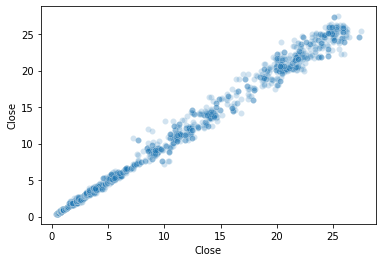

In [143]:
sns.scatterplot(x=df_mg_filled['Close'], y = df_mg_filled['Close'].shift(7), alpha = 0.2)

<AxesSubplot:xlabel='Close', ylabel='Close'>

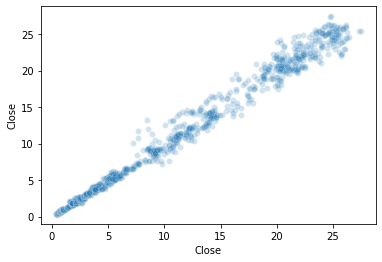

In [144]:
sns.scatterplot(x=df_mg['Close'], y = df_mg['Close'].shift(7), alpha = 0.2)

In [159]:
df_mg['weekday'] = df_mg.index.weekday
df_mg_filled['weekday'] = df_mg_filled.index.weekday

<AxesSubplot:xlabel='Close', ylabel='Count'>

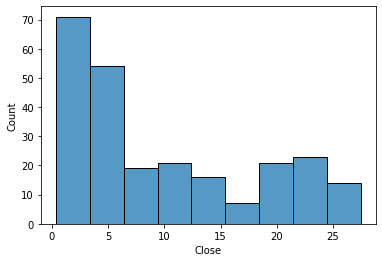

In [158]:
sns.histplot(df_mg[df_mg['weekday'] == 3].Close)

In [161]:
display(df_mg.groupby('weekday').mean())
display(df_mg_filled.groupby('weekday').mean())

,Open,High,Low,Close,Adj Close,Volume
weekday,,,,,,
0,9.859065,10.039010,9.642013,9.824629,9.714101,3.980148e+07
1,9.980925,10.182872,9.782613,9.981798,9.873328,4.602039e+07
2,9.949670,10.134268,9.739403,9.934172,9.826325,4.564627e+07
3,9.855446,10.051252,9.634769,9.841133,9.730386,4.352575e+07
4,9.895398,10.088226,9.688633,9.905161,9.794195,4.654301e+07


,Open,High,Low,Close,Adj Close,Volume
weekday,,,,,,
0,9.952979,10.141810,9.735155,9.930830,9.820857,3.760770e+07
1,9.960074,10.166844,9.766874,9.970154,9.859940,4.311001e+07
2,9.994146,10.178752,9.786665,9.980781,9.870479,4.384207e+07
3,9.983520,10.183157,9.762741,9.969560,9.859327,4.232148e+07
4,9.979609,10.175087,9.774642,9.989782,9.879203,4.359958e+07
5,9.979609,10.175087,9.774642,9.989782,9.879203,0.000000e+00
6,9.979609,10.175087,9.774642,9.989782,9.879203,0.000000e+00


<AxesSubplot:xlabel='Close', ylabel='Count'>

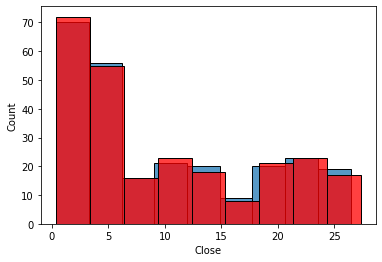

In [164]:
sns.histplot(df_mg_filled[df_mg_filled['weekday'] == 0]['Close'])
sns.histplot(df_mg_filled[df_mg_filled['weekday'] == 4]['Close'], color='red')

<AxesSubplot:xlabel='Close', ylabel='Count'>

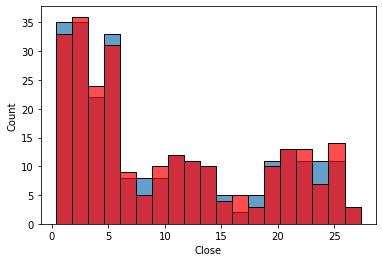

In [168]:
sns.histplot(df_mg_filled[df_mg_filled['weekday'] == 0]['Close'],
            bins=np.linspace(
                min(df_mg_filled[df_mg_filled['weekday'] == 0]['Close'].min(),
                 df_mg_filled[df_mg_filled['weekday'] == 4]['Close'].min()),
                max(df_mg_filled[df_mg_filled['weekday'] == 0]['Close'].max(),
                 df_mg_filled[df_mg_filled['weekday'] == 4]['Close'].max()),
                20
             ), alpha=0.7
    )
sns.histplot(df_mg_filled[df_mg_filled['weekday'] == 4]['Close'], color='red',
            bins=np.linspace(
                min(df_mg_filled[df_mg_filled['weekday'] == 0]['Close'].min(),
                 df_mg_filled[df_mg_filled['weekday'] == 4]['Close'].min()),
                max(df_mg_filled[df_mg_filled['weekday'] == 0]['Close'].max(),
                 df_mg_filled[df_mg_filled['weekday'] == 4]['Close'].max()),
                20
             ), alpha = 0.7
    )
# As populações são iguais?
# Aplicar o teste Komogorov-Sminorv

# Janelas deslizantes

<AxesSubplot:>

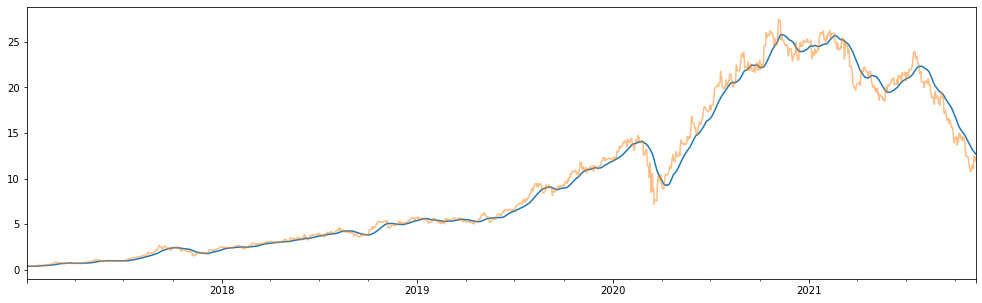

In [176]:
# 25
df_mg_filled.Close.rolling(window='30D').mean().plot(figsize=(17,5))
df_mg_filled.Close.plot(alpha = 0.5)

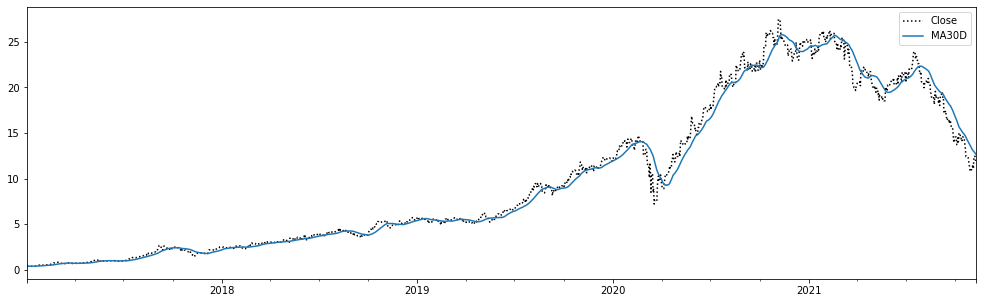

In [177]:
# 25
df_mg_filled.Close.plot(figsize=(17,5), style='k:', label='Close')
df_mg_filled.Close.rolling(window='30D').mean().plot(label='MA30D')
plt.legend()


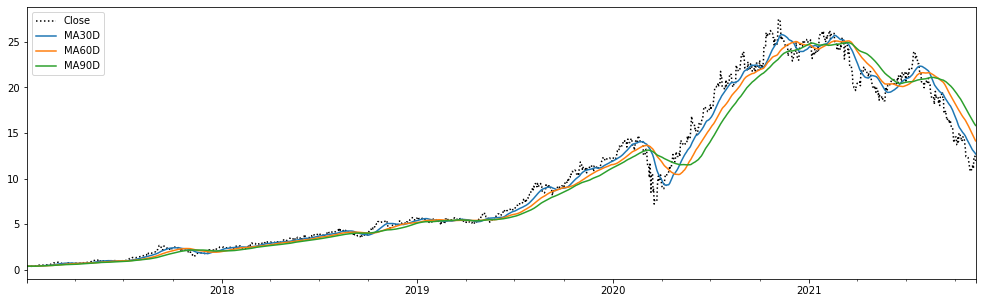

In [178]:
# 25
df_mg_filled.Close.plot(figsize=(17,5), style='k:', label='Close')
df_mg_filled.Close.rolling(window='30D').mean().plot(label='MA30D')
df_mg_filled.Close.rolling(window='60D').mean().plot(label='MA60D')
df_mg_filled.Close.rolling(window='90D').mean().plot(label='MA90D')
plt.legend()


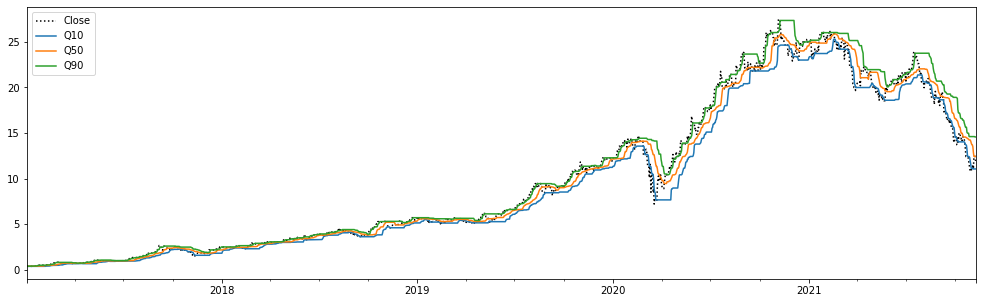

In [180]:

df_mg_filled.Close.plot(figsize=(17,5), style='k:', label='Close')
df_mg_filled.Close.rolling(window='30D').quantile(0.1).plot(label='Q10')
df_mg_filled.Close.rolling(window='30D').median().plot(label='Q50')
df_mg_filled.Close.rolling(window='30D').quantile(0.9).plot(label='Q90')
plt.legend()


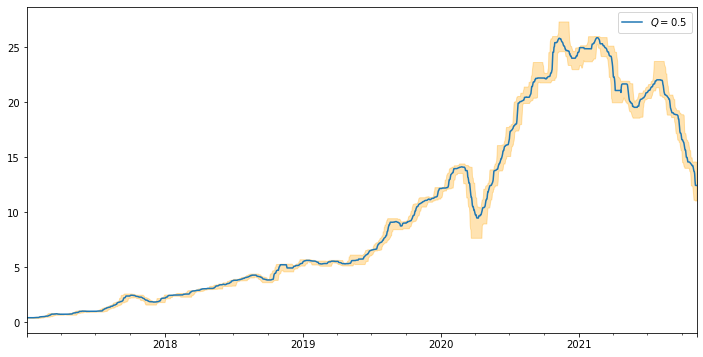

In [184]:
df_mg_filled.Close.rolling(window="30D").median().plot(figsize=(12,6), label='$Q = 0.5$')
plt.fill_between(
            df_mg_filled.Close.rolling(window="30D").median().index,
            y1=df_mg_filled.Close.rolling(window="30D").quantile(0.1),
            y2=df_mg_filled.Close.rolling(window="30D").quantile(0.9),
                color='orange', alpha=0.3)

plt.legend()

In [186]:
df_mg_filled.Close.rolling(window="30D").apply(lambda x: sum(x))

2017-01-02      0.397304
2017-01-03      0.793397
2017-01-04      1.168397
2017-01-05      1.556287
2017-01-06      1.941677
                 ...    
2021-11-04    390.190003
2021-11-05    388.170003
2021-11-06    386.580003
2021-11-07    384.050002
2021-11-08    381.010002
Freq: D, Name: Close, Length: 1772, dtype: float64

In [187]:
# 32
def get_entropy(series):
    def shannon_entropy(arr, bins=10):
        c_arr = np.histogram(arr, bins)[0]
        arr_normalized = c_arr/float(np.sum(c_arr))
        arr_normalized = arr_normalized[np.nonzero(arr_normalized)]
        h = -sum(arr_normalized * np.log2(arr_normalized))
        h = h/np.log2(arr.shape[0])
        return h
    h = shannon_entropy(series.values)
    if h == np.inf: return 1
    elif h == -np.inf: return 0
    else: return h

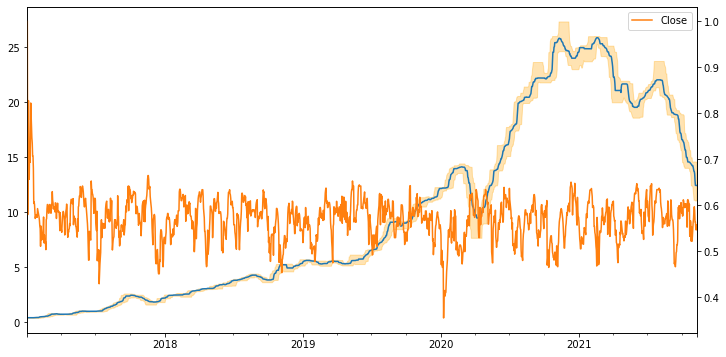

In [190]:
df_mg_filled.Close.rolling(window="30D").median().plot(figsize=(12,6), label='$Q = 0.5$')
plt.fill_between(
            df_mg_filled.Close.rolling(window="30D").median().index,
            y1=df_mg_filled.Close.rolling(window="30D").quantile(0.1),
            y2=df_mg_filled.Close.rolling(window="30D").quantile(0.9),
                color='orange', alpha=0.3)
df_mg_filled.Close.rolling(window="30D").apply(lambda x: get_entropy(x)).plot(secondary_y=True)

plt.legend()


<AxesSubplot:label='5982307a-5b56-4964-a734-3117e36ae2c6'>

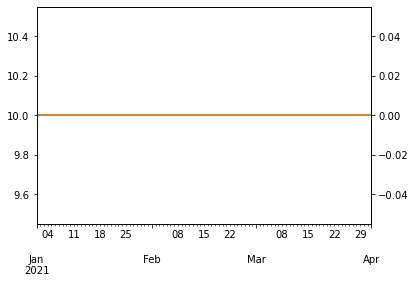

In [192]:
data = pd.DataFrame(index=pd.date_range('2021-01-01', '2021-04-01'))
data['val'] = 10
data.val.plot()
data.val.rolling('30D').apply(lambda x: get_entropy(x)).plot(secondary_y=True)

<AxesSubplot:label='6bf8811c-587f-4117-8081-a083c732dd7f'>

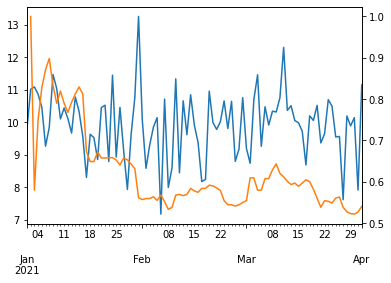

In [195]:
data = pd.DataFrame(index=pd.date_range('2021-01-01', '2021-04-01'))
data['val'] = np.random.normal(10, 1,size=data.shape[0])
data.val.plot()
data.val.rolling('30D').apply(lambda x: get_entropy(x)).plot(secondary_y=True)

**https://en.wikipedia.org/wiki/Approximate_entropy**

# Taxa de retorno

**Taxa de retorno**

- retorno de um período único

$$ r_t = \frac{P_t}{P_{t-1}}$$

- retorno de vários períodos
$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

In [196]:
# 34
df_value = pd.DataFrame(np.arange(20, 100, 20),
                       index=pd.date_range(start="2020", periods=4, freq="Q"),
                       columns=['value'])
df_value

,value
2020-03-31,20
2020-06-30,40
2020-09-30,60
2020-12-31,80


In [197]:
df_value['r'] = df_value['value'].pct_change()

In [198]:
df_value

,value,r
2020-03-31,20,NaN
2020-06-30,40,1.000000
2020-09-30,60,0.500000
2020-12-31,80,0.333333


In [199]:
df_value['cumulative_sum'] = df_value['value'].cumsum()

In [200]:
df_value

,value,r,cumulative_sum
2020-03-31,20,NaN,20
2020-06-30,40,1.000000,60
2020-09-30,60,0.500000,120
2020-12-31,80,0.333333,200


In [201]:
df_value['cumulative_prod'] = df_value['value'].cumprod()

In [202]:
df_value

,value,r,cumulative_sum,cumulative_prod
2020-03-31,20,NaN,20,20
2020-06-30,40,1.000000,60,800
2020-09-30,60,0.500000,120,48000
2020-12-31,80,0.333333,200,3840000


In [207]:
(df_mg_filled.pct_change() + 1).Close

2017-01-02         NaN
2017-01-03    0.996952
2017-01-04    0.946747
2017-01-05    1.034373
2017-01-06    0.993555
                ...   
2021-11-04    0.959307
2021-11-05    1.122744
2021-11-06    1.000000
2021-11-07    1.000000
2021-11-08    0.959003
Freq: D, Name: Close, Length: 1772, dtype: float64

In [206]:
(df_mg_filled.pct_change() + 1).dropna().Close.cumprod()

2017-01-03     0.996952
2017-01-04     0.943862
2017-01-05     0.976305
2017-01-06     0.970013
2017-01-07     0.970013
                ...    
2021-11-03    29.070939
2021-11-04    27.887965
2021-11-05    31.311035
2021-11-06    31.311035
2021-11-08    30.027385
Name: Close, Length: 1469, dtype: float64

- retorno de vários períodos
$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

<AxesSubplot:>

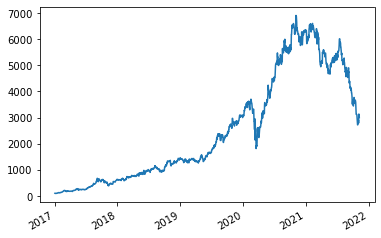

In [208]:
(((df_mg_filled.pct_change() + 1).dropna().Close.cumprod())*100).plot()

In [210]:
df_mg_filled.Close.expanding()

Expanding [min_periods=1,center=False,axis=0]

In [211]:
df_mg_filled.Close.expanding().sum()

2017-01-02        0.397304
2017-01-03        0.793397
2017-01-04        1.168397
2017-01-05        1.556287
2017-01-06        1.941677
                  ...     
2021-11-04    17625.310588
2021-11-05    17637.750588
2021-11-06    17650.190587
2021-11-07    17662.630587
2021-11-08    17674.560587
Freq: D, Name: Close, Length: 1772, dtype: float64

In [213]:
df_mg_filled['running_max'] = df_mg_filled['Close'].expanding().max()
df_mg_filled['running_min'] = df_mg_filled['Close'].expanding().min()

<AxesSubplot:>

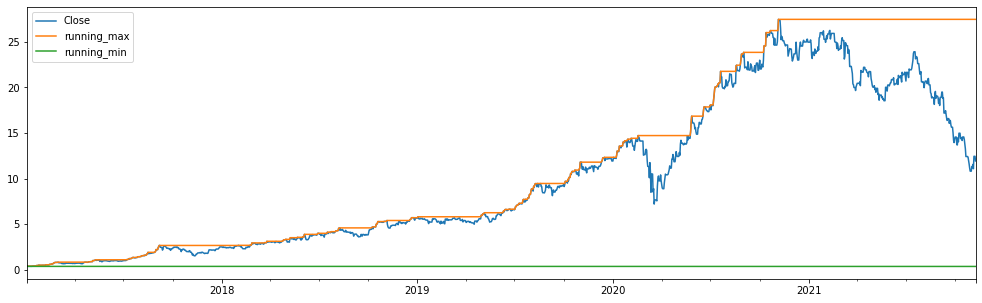

In [214]:
df_mg_filled[['Close', 'running_max', 'running_min']].plot(figsize=(17,5))

In [218]:
df_mg_filled_sliced = df_mg_filled.copy().loc['2020':]
df_mg_filled_sliced['running_max'] = df_mg_filled_sliced['Close'].expanding().max()
df_mg_filled_sliced['running_min'] = df_mg_filled_sliced['Close'].expanding().min()

<AxesSubplot:>

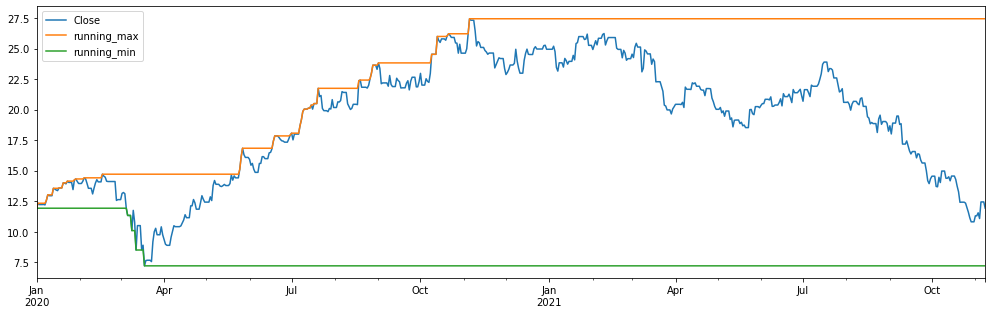

In [219]:
df_mg_filled_sliced[['Close', 'running_max', 'running_min']].plot(figsize=(17,5))

## Decomposição de séries temporais

Uma série temporal pode ser decomposta nos seguintes componentes:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é crescente, decrescente ou estável. Além disso indica a velocidade destas mudanças. 

<br>

- **Ciclos (C)**: são  oscilações de subida e de queda nas séries, de forma suave e repetida, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

<br>

- **Sazonalidade (S)**: são oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia. Os movimentos facilmente previsíveis, ocorrendo em intervalos regulares de tempo. A partir da sazonalidade pode-se classificar uma série temporal em aditiva ou multiplicativa. Uma **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo. A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**.

<br>


- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.
<br>

**Exemplo 1**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

![](https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png)

**Exemplo 2**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

![](https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png)

Em outras palavras, uma série temporal $Z(t)$ pode ser reconstruída atrvés de uma função que depende das componentes acima $f(T_t,C_t,S_t,\epsilon_t)$. Uma série aditiva é representada por $Z(t)=T_t+C_t+S_t+\epsilon_t$, equanto a multiplicativa é dada por $Z(t)=T_t \times C_t \times  S_t \times \epsilon_t$

`!pip install statsmodels`

In [220]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_flights = sns.load_dataset('flights')
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [221]:
df_flights.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [229]:
df_flights.index = pd.date_range(start='1949-01', periods=df_flights.shape[0], freq='M', )

In [231]:
df_flights.drop(['year', 'month'], axis=1, inplace=True)

<AxesSubplot:>

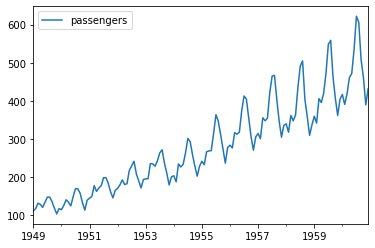

In [233]:
df_flights.plot()

In [234]:
decomp = seasonal_decompose(df_flights)

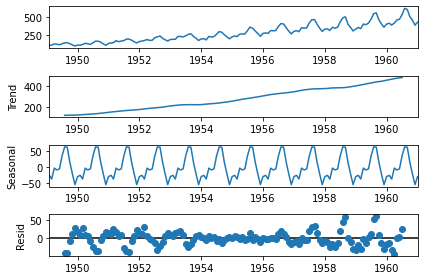

In [236]:
decomp.plot();

<AxesSubplot:>

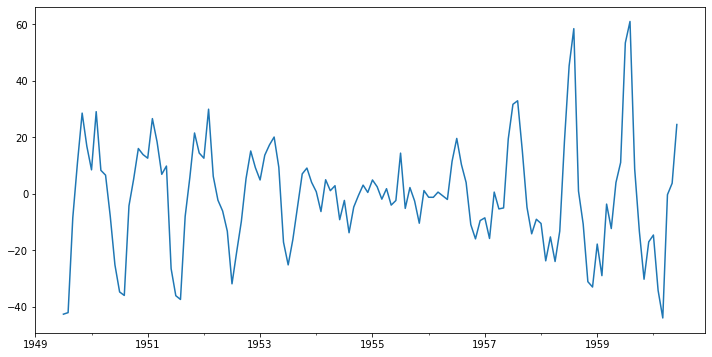

In [237]:
decomp.resid.plot(figsize=(12, 6))

<AxesSubplot:>

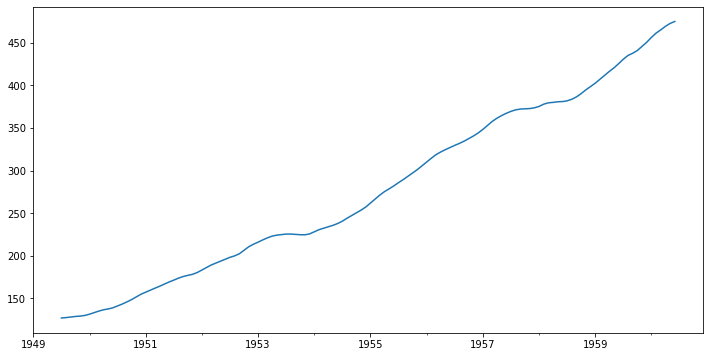

In [238]:
decomp.trend.plot(figsize=(12, 6))

In [239]:
decomp.trend.dropna()

1949-07-31    126.791667
1949-08-31    127.250000
1949-09-30    127.958333
1949-10-31    128.583333
1949-11-30    129.000000
                 ...    
1960-02-29    461.375000
1960-03-31    465.208333
1960-04-30    469.333333
1960-05-31    472.750000
1960-06-30    475.041667
Freq: M, Name: trend, Length: 132, dtype: float64